# Análisis de los viajes de plataforma "Zuber".

In [1]:
# Iniciamos importando las librerías con las que trabajaremos:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
# Pasamos los archivos CSV a DFs:
arch_r1 = "moved_project_sql_result_01.csv"
arch_r4 = "moved_project_sql_result_04.csv"
arch_r7 = "moved_project_sql_result_07.csv"

In [3]:
# Resultado 01:
df_r1 = pd.read_csv(arch_r1)

df_r1.sample(5)

,company_name,trips_amount
27,Service Taxi Association,402
12,Dispatch Taxi Affiliation,3355
59,4053 - 40193 Adwar H. Nikola,7
20,Checker Taxi,1486
37,1469 - 64126 Omar Jada,36


In [4]:
# Resultado 04:
df_r4 = pd.read_csv(arch_r4)

df_r4.sample(5)

,dropoff_location_name,average_trips
23,Rogers Park,299.033333
86,West Elsdon,5.666667
13,Uptown,849.666667
92,East Side,1.961538
67,Auburn Gresham,15.166667


In [5]:
# Resultado 07:
df_r7 = pd.read_csv(arch_r7)

df_r7.sample(5)

,start_ts,weather_conditions,duration_seconds
831,2017-11-25 11:00:00,Good,1680.0
181,2017-11-18 19:00:00,Good,1860.0
440,2017-11-11 08:00:00,Good,1380.0
211,2017-11-18 14:00:00,Good,3660.0
565,2017-11-04 04:00:00,Good,1440.0


## Paso 4: Análisis exploratorio de la información obtenida mediante Queries en SQL:

Para los DF de Resultados 01 y 04:

1) Estudiaremos los datos que contienen.
2) Nos aseguraremos de que los tipos de datos sean correctos.
3) Identificaremos los 10 principales barrios en términos de finalización del recorrido.
4) Vamos a hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.

Por último, obtendremos conclusiones a partir de las actividades descritas.

### Resultados 01: Viajes de taxi por compañía:

In [9]:
# Comenzamos revisando el DF, ya hemos hecho una previsualización antes:
print(df_r1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [27]:
# Buscamos registros duplicados:
print("Se tienen",df_r1.duplicated().sum(),"registros duplicados.")
print("Hay",df_r1['company_name'].nunique(),"compañías de taxis.")
print("En total se realizaron",df_r1['trips_amount'].sum(),"viajes de taxi entre todas las compañías.")

Se tienen 0 registros duplicados.
Hay 64 compañías de taxis.
En total se realizaron 137311 viajes de taxi entre todas las compañías.


In [29]:
# Revisamos un resumen de la información:
df_r1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
trips_amount,64.0,2145.48,3812.31,2.0,20.75,178.5,2106.5,19558.0


Todo se ve correcto para este primer DF, no tenemos valores ausentes y el tipo de datos es apropiado.

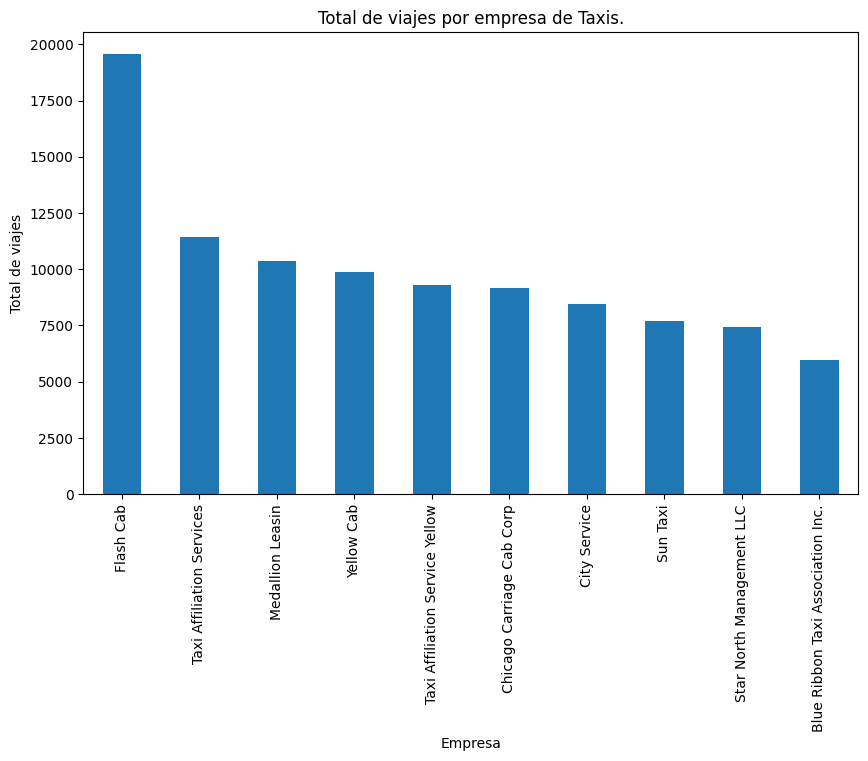

In [37]:
# Realizamos un gráfico de barras para presentar la cantidad de viajes por empresa:
top_diez_emp = df_r1.sort_values('trips_amount',ascending=False).head(10)

top_diez_emp.plot(kind='bar',
           x='company_name', y='trips_amount',
           title='Total de viajes por empresa de Taxis.',
           xlabel= 'Empresa',ylabel='Total de viajes',
           rot=90, figsize=[10,6], legend=False)

plt.show()

#### Conclusión:

De acuerdo con lo presentado en el gráfico anterior, se puede apreciar que más de la mitad de las empresas de taxis analizadas realizaron menos de 2500 viajes, incluso siendo menos de 500 para la mayoría, mientras que apenas son 8 las compañías que realizaron más de 7500 viajes siendo Flash Cab, por mucho, la empresa que más viajes realizó en total.

En base a lo anterior, pudiera ser sencillo catalogar a las empresas de taxis según el número total de viajes realizados para poder analizar cada subgrupo con menos sesgo.

Por otro lado, un mejor indicador del "éxito" de una empresa de taxis pudiera ser el número de viajes / número de unidades (taxis) con los que cuenta la empresa.

### Resultados 04: Viajes promedio por destino.

In [23]:
# Comenzamos revisando el DF, ya hemos hecho una previsualización antes:
print(df_r4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


Nuevamente, el tipo de dato coincide con lo esperado y no tenemos datos ausentes, por lo que podemos continuar.

In [32]:
# Buscamos registros duplicados:
print("Se tienen",df_r4.duplicated().sum(),"registros duplicados.")
print("Hay",df_r4['dropoff_location_name'].nunique(),"colonias de destino.")
print("En total se realizaron",format(df_r4['average_trips'].sum(),".2f"),"viajes de taxi a los destinos.")

Se tienen 0 registros duplicados.
Hay 94 colonias de destino.
En total se realizaron 56395.65 viajes de taxi a los destinos.


In [33]:
# Un resumen de los datos:
df_r4.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
average_trips,94.0,599.95,1714.59,1.8,14.27,52.02,298.86,10727.47


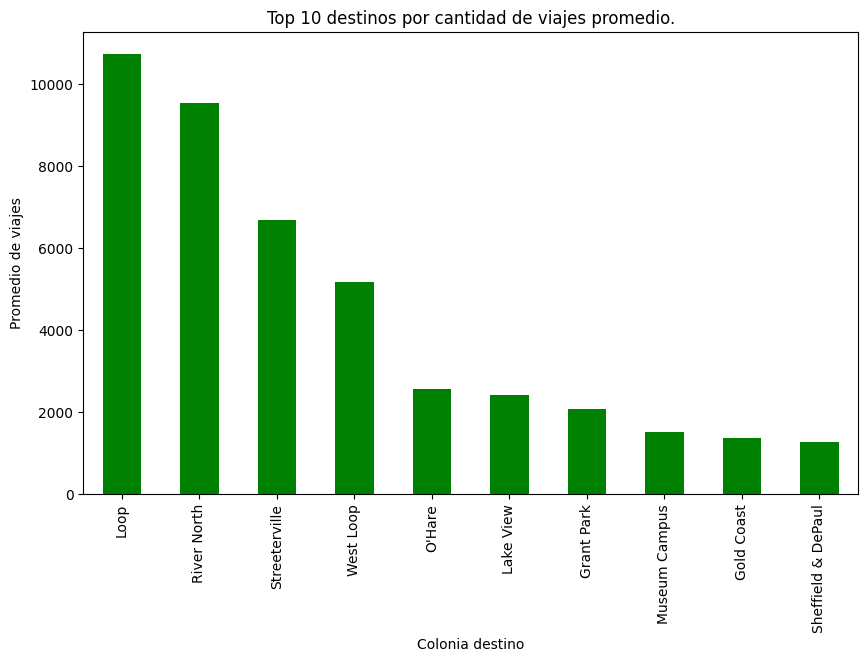

In [36]:
# Realizamos un gráfico de barras para presentar la cantidad de viajes promedio a cada destino para el top 10 de destinos:
top_diez_dest = df_r4.sort_values('average_trips',ascending=False).head(10)

top_diez_dest.plot(kind='bar',
           x='dropoff_location_name', y='average_trips',
           title='Top 10 destinos por cantidad de viajes promedio.',
           xlabel= 'Colonia destino',ylabel='Promedio de viajes',
           rot=90, figsize=[10,6], legend=False,
           color='green')

plt.show()

#### Conclusión:

Hemos identificado el top 10 de destinos más populares para los viajes en taxi, así mismo, podemos apreciar que todos ellos superan con crecer el percentil 75% de la información que es solo de 298.86 viajes por destino, con principal importancia los 4 destinos más populares que más del 60% de los viajes registrados.

Por último, según vimos en la primer etapa del proyecto, The Loop es una zona céntrica de Chigago y muy turística y O'Hare alberga el aeropuerto internacional, ambos destinos pertenecen al Top 5 de más populares.

### Resultados 07: Revisión de los viajes en días sábados desde el Loop hasta el aeropuerto internacional O'Hare:

Para esta etapa, probaremos la hipótesis establecida: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Para poder comprobar o desmentir la hipótesis, dividiremos el dataframe en dos partes, la primera, con los días "buenos (Good)", la segunda con los "lluviosos (Bad)", en ambos casos, omitiremos las fechas ya que sabemos que siempre son sábados.

In [48]:
# Dividimos el data frame en dos:
df_good_days = df_r7['duration_seconds'][df_r7['weather_conditions']=='Good']
df_bad_days = df_r7['duration_seconds'][df_r7['weather_conditions']=='Bad']

# Establecemos un valor de relevancia del 5%:
alpha = 0.05

# Prueba de la hipótesis:
prueba = st.ttest_ind(df_good_days,df_bad_days,equal_var=False)

print('Valor p:', prueba.pvalue)

if (prueba.pvalue < alpha):
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes desde The Loop hasta O'Hare no varía cuando hay lluvia.")
else:
    print("No podemos rechazar la hipótesis nula. No es sencillo distinguir si en un sábado llovió o no según la duración de los viajes en taxi desde The Loop hasta O'Hare.")

Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula. La duración promedio de los viajes desde The Loop hasta O'Hare no varía cuando hay lluvia.


#### Comprobación:

In [45]:
df_r7[['weather_conditions','duration_seconds']].groupby('weather_conditions').mean()

,duration_seconds
weather_conditions,
Bad,2427.205556
Good,1999.675676


In [57]:
print("Con buen clima:\n",df_r7[df_r7['weather_conditions']=='Good'].describe().T.round(2))

print("\n")

print("Con lluvia:\n",df_r7[df_r7['weather_conditions']=='Bad'].describe().T.round(2))

Con buen clima:
                   count     mean    std  min      25%     50%     75%     max
duration_seconds  888.0  1999.68  759.2  0.0  1389.75  1800.0  2460.0  7440.0


Con lluvia:
                   count     mean     std    min     25%     50%     75%  \
duration_seconds  180.0  2427.21  721.31  480.0  1962.0  2540.0  2928.0   

                     max  
duration_seconds  4980.0  


#### Conclusión:

Hemos establecido un nivel de significancia (alfa) de 5% para poder validar la hipótesis puesto una comprobación en este rango de confianza da más solidez a la conclusión, sin embargo, vemos que el valor de p es mucho más pequeño que eso, por lo cual podemos decir que las duraciones promedio de los viajes desde The Loop hasta O'Hare los días sábado no varía de forma significativa si hay lluvia o no.